In [1]:
import numpy as np
import matplotlib.pyplot as plt


C_train = 200
C_test = 600
C_total = C_train + C_test

t = np.linspace(0, 16 * np.pi, C_total) # time
noise_var = 0.1 # noise variance
noise = noise_var * np.random.randn(C_total) # the noise itself
x = np.cos(t)  + noise # time series

# `seq2col`

In [6]:
def seq2col(seq, filter_size):
    """
    Convert a 1D sequence `seq` into `X` and `y` where
    - `X` is a 2D array of patches (sliding windows).
    - `y` is a 1D array such that y[i] is the value in `seq` immediately following the i-th patch
    

    Parameters:
        sequence (numpy array): Input 1D sequence.
        filter_size (int): Size of each window (or patch).

    Returns:
        X (numpy array)
        y (numpy array)

    Example:
        If `filter_size = 3` and `sequence = [2, 4, 6, 8, 10]`, then:
        
        X will be:
            [[2, 4, 6],
             [4, 6, 8]]
        
        y will be:
            [8, 10]

        Here, `X` contains overlapping windows of size `filter_size`, and `y` represents
        the next value in the sequence for each window.
    """
    X = np.zeros((len(seq) - filter_size, filter_size))
    y = seq[filter_size:]
    
    for i in range(len(seq) - filter_size):
        X[i, :] = seq[i:i + filter_size]

    return X, y

seq2col([2,4,6,8,10], 3)
# expected output
#
# (array([[2., 4., 6.],
#         [4., 6., 8.]]),
#  [8, 10])

(array([[2., 4., 6.],
        [4., 6., 8.]]),
 [8, 10])

In [3]:

# Usage example
filter_size = 20
train_x = x[:C_train]

# Convert sequence into design matrix and target vector
X, y = seq2col(train_x, filter_size)


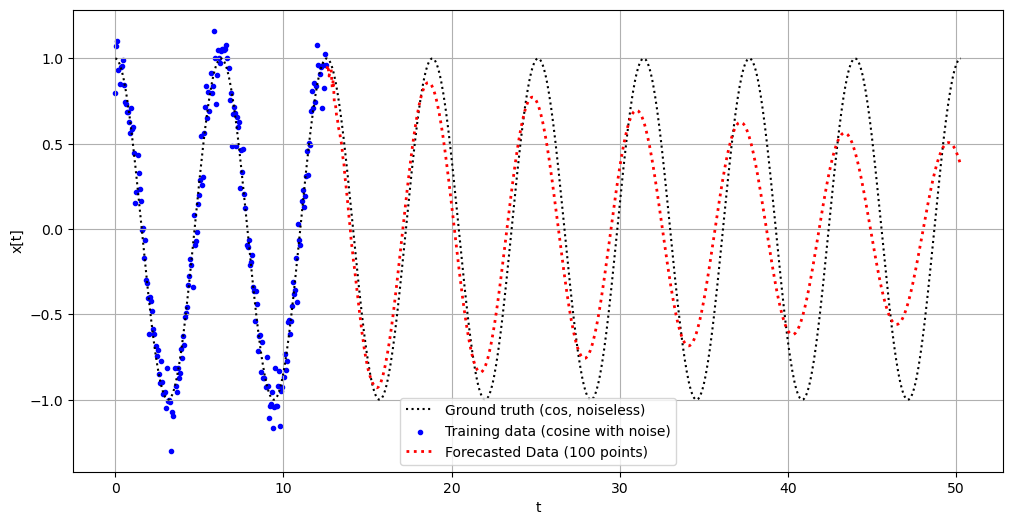

In [4]:

X_tilde = np.hstack([X, np.ones((X.shape[0], 1))])

w = np.linalg.pinv(X_tilde) @ y

weights, bias = w[:-1], w[-1]

forecast = []
current_input = train_x[-filter_size:].tolist()

for i in range(C_test):
    predicted_value = np.dot(current_input, weights) + bias
    forecast.append(predicted_value)
    current_input.pop(0)
    current_input.append(predicted_value)

plt.figure(figsize=(12, 6))
plt.plot(t, np.cos(t), label='Ground truth (cos, noiseless)', color='k', linestyle=':')
plt.scatter(t[:C_train], x[:C_train], label='Training data (cosine with noise)', color='blue', marker='.')

plt.plot(t[C_train:], forecast, label='Forecasted Data (100 points)', color='red', linestyle=':', linewidth=2)

plt.xlabel('t')
plt.ylabel('x[t]')
plt.legend()
plt.grid(True)
plt.show()


# Discussion: Fibonacci

How can we interpret coefficient of `w` below?

In [24]:
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

fibonnaci_seq = list(fibonacci(20))

filter_size = 3
X, y = seq2col(fibonnaci_seq[:10], filter_size)

X_tilde = np.hstack([X, np.ones((X.shape[0], 1))])
w = np.linalg.pinv(X_tilde) @ y
np.round(w,5)

array([-0.,  1.,  1.,  0.])